In [1]:
import tensorflow as tf
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow


from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

from keras.backend.tensorflow_backend import set_session  
config = tf.ConfigProto()  
config.gpu_options.allow_growth = True  
set_session(tf.Session(config=config)) 

Using TensorFlow backend.


In [2]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [7]:
train_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'data/validate',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

model.fit_generator(
        train_generator,
        steps_per_epoch=5,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=5)

Found 1143 images belonging to 3 classes.
Found 110 images belonging to 3 classes.
Epoch 1/5
5/5 [==============================] - 37s 7s/step - loss: 0.3036 - acc: 0.1000 - val_loss: -1.9431 - val_acc: 0.1549
Epoch 2/5
5/5 [==============================] - 35s 7s/step - loss: -0.5192 - acc: 0.1938 - val_loss: -2.7999 - val_acc: 0.1972
Epoch 3/5
5/5 [==============================] - 36s 7s/step - loss: -0.1118 - acc: 0.2563 - val_loss: -3.3555 - val_acc: 0.2254
Epoch 4/5
5/5 [==============================] - 37s 7s/step - loss: -2.6222 - acc: 0.2312 - val_loss: -1.3659 - val_acc: 0.1290
Epoch 5/5
5/5 [==============================] - 34s 7s/step - loss: -0.6382 - acc: 0.3500 - val_loss: -3.3433 - val_acc: 0.1620


[[0.]]


0

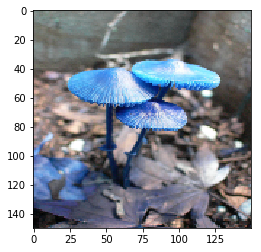

In [16]:
image = cv.imread('D://GIT//Uni//tensorflow//data//train/shrooms/22.jpg')
image = cv.resize(image, (150,150))
plt.imshow(image)
img = (np.expand_dims(image,0))
result = model.predict(img)
print(result)
np.argmax(result[0])

#image = np.expand_dims(image, axis=0)
#a = model.predict(image)
#print(a)

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Normalizing the axes
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)



model = tf.keras.models.Sequential()
#Input layer
model.add(tf.keras.layers.Flatten())
#Hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#Output layer -> number of classifcations
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


#default is adam, but there are many more, quite advanced topic
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.2607 - acc: 0.9240
Epoch 2/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.1056 - acc: 0.9674
Epoch 3/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0719 - acc: 0.9770
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0535 - acc: 0.9829
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0395 - acc: 0.9871
Epoch 6/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0323 - acc: 0.9892
Epoch 7/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0239 - acc: 0.9920
Epoch 8/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0199 - acc: 0.9932
Epoch 9/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0183 - acc: 0.9937
Epoch 10/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0168 - acc: 0.99

In [12]:
img = (np.expand_dims(x_train[0],0))
result = model.predict(img)
np.argmax(result[0])

5

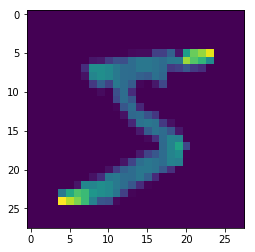

In [13]:
plt.imshow(x_train[0])

(5866, 3736)


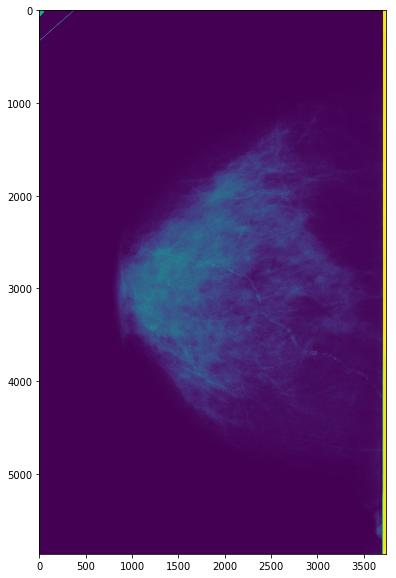

In [43]:
impath = 'D:/NeuralNetworkData/MammographyImges/normals/normal_01/case0003/A_0003_1.LEFT_CC.tiff'
impath = 'D:/NeuralNetworkData/MammographyImges/normals/normal_04/case0414/A_0414_1.LEFT_CC.tiff'
img = plt.imread(impath)
print(img.shape)
plt.rcParams['figure.figsize'] = [30, 10]
plt.imshow(img)

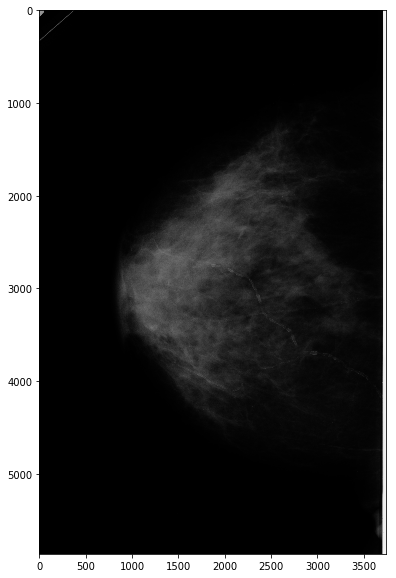

In [44]:
cv_im = cv.imread(impath)
plt.imshow(cv_im)